## Understanding the Decision Tree Structure
The decision tree structure can be analyzed to understand the relation between the features and the target.

1. Load the data

In [9]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the data
iris = load_iris()
X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

2. Train the classifier

In [10]:
clf = DecisionTreeClassifier(
    max_leaf_nodes=3, random_state=0
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

3. Tree structure

The decision tree classifier has an attribute called `tree_` which allows access to low level attributes such as `node_count`, the total number of nodes, and `max_depth`, the maximal depth of the tree. The `tree_.compute_node_depths()` method computes the depth of each node in the tree. `tree_` also stores the entire binary tree structure, represented as a number of parallel arrays. The i-th element of each array holds information about the node `i`.

Some of the arrays only apply to either leaves or split nodes. In this case, the values of the nodes of the other type is arbitrary. For example, the arrays `feature` and `threshold` only apply to split nodes. The values for leaf nodes in these arrays are therefore arbitrary.

In [11]:
# Compute the depth of each node
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature 
threshold = clf.tree_.threshold 
values = clf.tree_.value 

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]

# Iterate the tree
while len(stack) > 0:
    # pop to ensure each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    # If the left and right child of a node is not the same
    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

# Print the tree and nodes
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i]*"\t", node=i, value=np.around(values[i], 3)
            ))
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i]*"\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),                        
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node with value=[[0.33  0.304 0.366]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[1. 0. 0.]].
	node=2 is a split node with value=[[0.    0.453 0.547]]: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value=[[0.    0.917 0.083]].
		node=4 is a leaf node with value=[[0.    0.026 0.974]].


4. Tree node values

The `tree_.value` array is a 3x array of shape [n_nodes, n_classes, n_outputs] which provides the proportion of samples reaching a node for each class and for each output. Each node has a `value` array which is the proportion of weighted samples reaching this node for each output and class with respect to the parent node.

One could convert this to the absolute weighted number of samples reaching a node, by multiplying this number by `tree_.weighted_n_node_samples[node_idx]` for the given node. Note sample weights are not used in this example, so the weighted number of samples is the number of samples reaching the node because each sample has a weight of 1 by default.

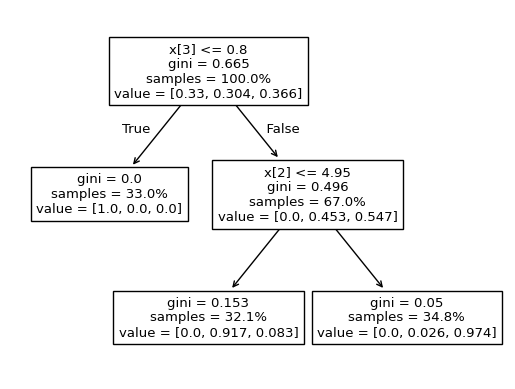

In [12]:
# Plot the tree
tree.plot_tree(clf, proportion=True)
plt.show()